### Name :- Rane Sanskruti
### Roll NO :- EN23107140
### Batch :- B
### Assignment No :- 3( Develop a sentiment analysis model to analyze customer reviews of products or services.)

In [2]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /home/admin1/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/admin1/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/admin1/nltk_data...


True

In [6]:
df = pd.read_csv("Reviews.csv")
print(df.shape)
df.head()


(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
def label_sentiment(score):
    if score >= 4:
        return "positive"
    elif score <= 2:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df["Score"].apply(label_sentiment)

# Remove neutral reviews
df = df[df["sentiment"] != "neutral"]

print(df["sentiment"].value_counts())


sentiment
positive    443777
negative     82037
Name: count, dtype: int64


In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df["clean_text"] = df["Text"].apply(preprocess_text)


In [11]:
df_sample = df.sample(50000, random_state=42)

X = df_sample["clean_text"]
y = df_sample["sentiment"]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [15]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9174

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.57      0.68      1542
    positive       0.93      0.98      0.95      8458

    accuracy                           0.92     10000
   macro avg       0.89      0.77      0.82     10000
weighted avg       0.91      0.92      0.91     10000



In [16]:
def predict_sentiment(review):
    review = preprocess_text(review)
    review_tfidf = tfidf.transform([review])
    return model.predict(review_tfidf)[0]

print(predict_sentiment("This product is excellent and worth the price"))
print(predict_sentiment("Very poor quality and disappointing experience"))


positive
negative


In [32]:
print(predict_sentiment("Good quality but very poor packaging"))


positive


In [34]:
print(predict_sentiment("poor packaging but very good quality"))


positive


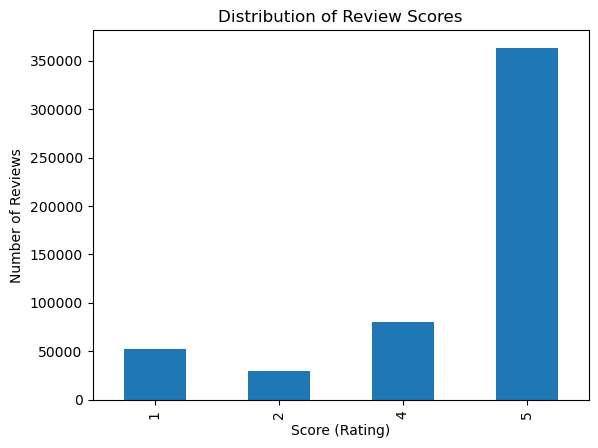

In [36]:
import matplotlib.pyplot as plt

df["Score"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Score (Rating)")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Scores")
plt.show()
